In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 准备数据

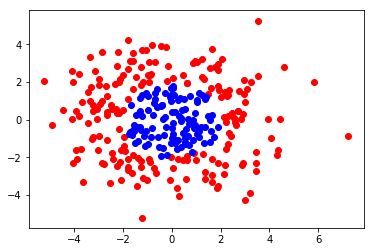

In [60]:
def makeDataSet():
    dataSet = np.random.normal(scale=2, size=(300, 2))
    index = (np.square(dataSet[:, 0]) + np.square(dataSet[:, 1])) > 4  #大于2为红点

    red_x = [] ; red_y = [] ; blue_x = [] ; blue_y = []
    for i in range(0, len(index)):
        if index[i] == True:
            red_x.append(dataSet[i, 0])
            red_y.append(dataSet[i, 1])
        else:
            blue_x.append(dataSet[i, 0])
            blue_y.append(dataSet[i, 1])

    plt.scatter(red_x, red_y, c='red')
    plt.scatter(blue_x, blue_y, c='blue')
    plt.show()
    
    return red_x, red_y, blue_x, blue_y

In [62]:
a = np.random.normal(seed=1)

TypeError: normal() got an unexpected keyword argument 'seed'